# MOVIE GENRE CLASSIFICATION

In [2]:
import pandas as pd

# Function to parse each line
def parse_line(line):
    parts = line.strip().split(" ::: ")
    if len(parts) == 4:
        return {
            "id": int(parts[0]),
            "title": parts[1],
            "genre": parts[2],
            "plot": parts[3]
        }
    return None

# Read and parse file
train_data = []
with open("/content/train_data.txt", "r", encoding="utf-8") as file:
    for line in file:
        parsed = parse_line(line)
        if parsed:
            train_data.append(parsed)

# Create DataFrame
train_df = pd.DataFrame(train_data)
print(train_df.head())


   id                             title     genre  \
0   1      Oscar et la dame rose (2009)     drama   
1   2                      Cupid (1997)  thriller   
2   3  Young, Wild and Wonderful (1980)     adult   
3   4             The Secret Sin (1915)     drama   
4   5            The Unrecovered (2007)     drama   

                                                plot  
0  Listening in to a conversation between his doc...  
1  A brother and sister with a past incestuous re...  
2  As the bus empties the students for their fiel...  
3  To help their unemployed father make ends meet...  
4  The film's title refers not only to the un-rec...  


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Extract features and labels
X = train_df['plot']
y = train_df['genre']

# TF-IDF Vectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_tfidf = vectorizer.fit_transform(X)

# Train-test split for validation
X_train, X_val, y_train, y_val = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.naive_bayes import MultinomialNB

# Extract features and labels
X = train_df['plot']
y = train_df['genre']

# TF-IDF Vectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_tfidf = vectorizer.fit_transform(X)


# Train a Naive Bayes classifier (or load your previous model if saved)
clf = MultinomialNB()  # This was likely the original model
clf.fit(X_tfidf, y)    # Re-train or use X_train, y_train if you split

# Now continue with your test data loading and prediction
# Load test data
test_plots = []
test_ids = []

with open("/content/test_data.txt", "r", encoding="utf-8") as file:
    for line in file:
        parts = line.strip().split(" ::: ")
        if len(parts) == 3:
            test_ids.append(int(parts[0]))
            test_plots.append(parts[2])

# Transform test plots using the same vectorizer
X_test_tfidf = vectorizer.transform(test_plots)

# Predict genres
test_predictions = clf.predict(X_test_tfidf)

# Save results
submission = pd.DataFrame({
    "id": test_ids,
    "predicted_genre": test_predictions
})

submission.to_csv("genre_predictions.csv", index=False)


In [ ]:
# Load labeled test data (like train data)
solution_data = []

with open("/content/test_data_solution.txt", "r", encoding="utf-8") as file:
    for line in file:
        parts = line.strip().split(" ::: ")
        if len(parts) == 4:
            solution_data.append({
                "id": int(parts[0]),
                "title": parts[1],
                "genre": parts[2],
                "plot": parts[3]
            })

# Create DataFrame
solution_df = pd.DataFrame(solution_data)
solution_df['id'] = solution_df['id'].astype(str)  # Ensure ID is str
#print(solution_df.head())


In [ ]:
# Transform the test plots using TF-IDF
X_test = vectorizer.transform(solution_df['plot'])

# Predict genres
predicted_genres = clf.predict(X_test)

# Add to solution_df
solution_df['predicted_genre'] = predicted_genres

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

print("Accuracy:", accuracy_score(solution_df['genre'], solution_df['predicted_genre']))
print(classification_report(solution_df['genre'], solution_df['predicted_genre']))


Accuracy: 0.5239483394833948


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

      action       0.54      0.11      0.18      1314
       adult       0.50      0.06      0.11       590
   adventure       0.81      0.07      0.13       775
   animation       0.00      0.00      0.00       498
   biography       0.00      0.00      0.00       264
      comedy       0.51      0.42      0.46      7446
       crime       0.00      0.00      0.00       505
 documentary       0.57      0.87      0.69     13096
       drama       0.46      0.82      0.59     13612
      family       0.50      0.00      0.00       783
     fantasy       0.00      0.00      0.00       322
   game-show       0.98      0.32      0.48       193
     history       0.00      0.00      0.00       243
      horror       0.69      0.36      0.47      2204
       music       0.74      0.15      0.25       731
     musical       0.00      0.00      0.00       276
     mystery       0.00      0.00      0.00       318
        news       0.00    

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Using Linear SVM TO increase the accuracy

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC # Import LinearSVC

param_grid = {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']}
grid_search = GridSearchCV(LinearSVC(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_clf = grid_search.best_estimator_

/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
from sklearn.pipeline import Pipeline

# Combine plot and title features
X = df[['plot', 'genre']]

# Create a pipeline with TF-IDF and classifier
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english', max_features=5000)),
    ('clf', LinearSVC())
])

# Train and evaluate the pipeline


In [ ]:


import pandas as pd
# Fit the best classifier to the entire training data
best_clf.fit(X_tfidf, y)

# Predict on the test data using the best classifier
predicted_genres_best = best_clf.predict(X_test)

# Create a submission DataFrame with the best classifier's predictions
submission_best = pd.DataFrame({
    "id": test_ids,
    "predicted_genre": predicted_genres_best
})

# Save the results to a CSV file
submission_best.to_csv("genre_predictions_best.csv", index=False)

# Evaluate the best classifier on the solution data
predicted_genres_best_solution = best_clf.predict(X_test)

# Add the predictions to the solution DataFrame
solution_df['predicted_genre_best'] = predicted_genres_best_solution

# Print the accuracy and classification report for the best classifier
print("Accuracy (Best Classifier):", accuracy_score(solution_df['genre'], solution_df['predicted_genre_best']))
print(classification_report(solution_df['genre'], solution_df['predicted_genre_best']))

X_train_text, X_val_text, y_train, y_val = train_test_split(
    X['plot'], X['genre'], test_size=0.2, random_state=42
)

pipeline.fit(X_train_text, y_train)  # Use raw text for fitting the pipeline
y_pred_pipeline = pipeline.predict(X_val_text)  # Use raw text for prediction
print(f"Pipeline accuracy: {accuracy_score(y_val, y_pred_pipeline)}")


Accuracy (Best Classifier): 0.580959409594096


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

      action       0.48      0.26      0.34      1314
       adult       0.62      0.26      0.37       590
   adventure       0.62      0.15      0.25       775
   animation       0.48      0.06      0.11       498
   biography       0.00      0.00      0.00       264
      comedy       0.53      0.56      0.54      7446
       crime       0.37      0.02      0.04       505
 documentary       0.65      0.87      0.75     13096
       drama       0.54      0.77      0.64     13612
      family       0.56      0.07      0.12       783
     fantasy       0.57      0.05      0.09       322
   game-show       0.75      0.60      0.67       193
     history       0.00      0.00      0.00       243
      horror       0.60      0.61      0.60      2204
       music       0.64      0.46      0.53       731
     musical       0.29      0.01      0.03       276
     mystery       0.33      0.01      0.01       318
        news       0.73    

# CREDIT CARD FRAUD DETECTION

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

# Load your customer churn data
try:
    df = pd.read_csv('/content/Churn_Modelling.csv')  # Replace with your file path
except FileNotFoundError:
    print("Error: 'customer_churn.csv' not found. Please upload your data file.")
    exit()

# Print the column names to identify the correct target variable name
print(df.columns)

# Data preprocessing
# Identify numerical and categorical features
numerical_cols = df.select_dtypes(include=['number']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Remove the target column ('Exited') from numerical_cols if it's there
numerical_cols = numerical_cols.drop('Exited', errors='ignore')


# Handle missing values
imputer = SimpleImputer(strategy='mean')
df[numerical_cols] = imputer.fit_transform(df[numerical_cols])

# Encode categorical features
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

# Feature Scaling
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


X = df.drop('Exited', axis=1)  # 'Exited' is the target column, representing churn
y = df['Exited']  # 'Exited' should be binary (0 or 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')
Accuracy: 0.8655

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.77      0.45      0.57       393

    accuracy                           0.87      2000
   macro avg       0.82      0.71      0.74      2000
weighted avg       0.86      0.87      0.85      2000


Confusion Matrix:
 [[1555   52]
 [ 217  176]]


# CUSTOMER CHURN PREDICTION

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


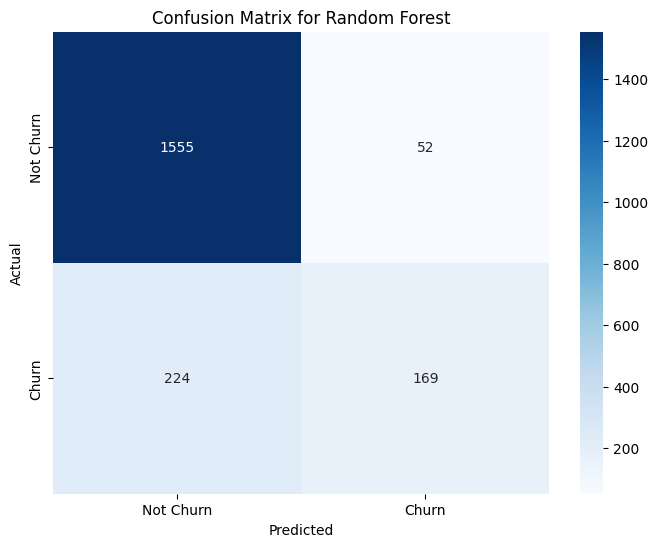

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler # Import StandardScaler

rf_model = model

scaler = StandardScaler() # Create StandardScaler if not already created
X_test_scaled = scaler.fit_transform(X_test) # Scale the test data


# Predict on the test set
rf_preds = rf_model.predict(X_test_scaled)


# Generate confusion matrix
cm = confusion_matrix(y_test, rf_preds)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Not Churn', 'Churn'],
            yticklabels=['Not Churn', 'Churn'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Random Forest")
plt.show()

# SPAM SMS DETECTION

Accuracy: 0.967713004484305
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       0.99      0.77      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.97      1115

Predicted label for 'Congratulations! You've won a free prize!': Spam


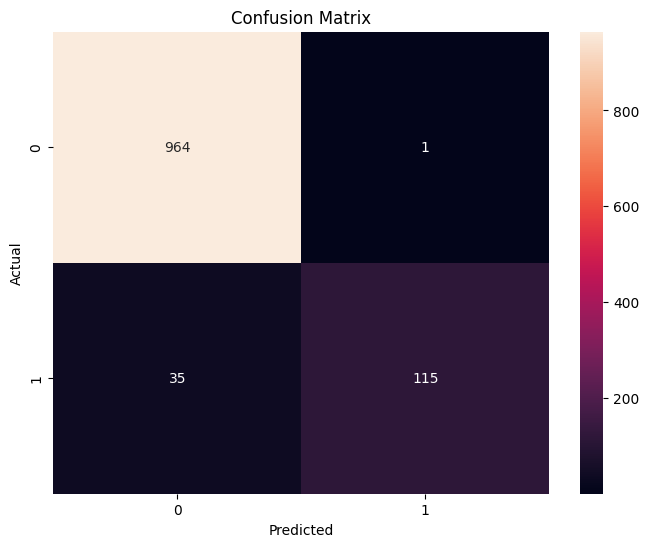

In [ ]:

import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the SMS Spam Collection dataset
df = pd.read_csv('/content/spam (1).csv', encoding='latin-1')

# Select relevant columns and rename them
df = df[['v1', 'v2']]
df.rename(columns={'v1': 'label', 'v2': 'message'}, inplace=True)

# Convert labels to numerical values (0 for ham, 1 for spam)
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['message'], df['label'], test_size=0.2, random_state=42)

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

# Example prediction
new_message = "Congratulations! You've won a free prize!"
new_message_tfidf = vectorizer.transform([new_message])
predicted_label = model.predict(new_message_tfidf)[0]
print(f"Predicted label for '{new_message}': {'Spam' if predicted_label == 1 else 'Ham'}")

#Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
